**=== Mall Customer Segmentation Data ===**

by **Verindra Hernanda Putra**

# Overview

The overral process is : 

- Data Loading, Exploration, and Preparation
- Feature Scaling
- Finding the Optimal Number of Clusters (K)
- Applying K-Means and Assigning Labels
- Cluster Profiling & Persona Creation

# Data Loading, Exploration, and Preparation

Preparation for the dataset, libraries, etc

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
df = pd.read_csv('../input/Mall_Customers.csv')

In [4]:
# Basic Information on Dataset
print("--- Dataset Head ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Statistical Summary ---")
print(df.describe())

--- Dataset Head ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- Statisti

In [5]:
# Check for missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Rename columns for easier access
df.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

print("\n--- DataFrame with Cleaned Column Names ---")
print(df.head())


--- DataFrame with Cleaned Column Names ---
   CustomerID  Gender  Age  Annual_Income_k  Spending_Score
0           1    Male   19               15              39
1           2    Male   21               15              81
2           3  Female   20               16               6
3           4  Female   23               16              77
4           5  Female   31               17              40


In [7]:
# Feature Selection
# For this K-Means analysis, we will focus on the numerical features that describe customer behavior.
# 'CustomerID' is a unique identifier and provides no clustering value.
# 'Gender' is categorical. While it could be included using techniques like one-hot encoding,
# the core of the segmentation lies in the numerical behavioral data.
# We will base our primary clusters on Age, Income, and Spending Score.

features_for_clustering = ['Age', 'Annual_Income_k', 'Spending_Score']
X = df[features_for_clustering]

print("\n--- Selected Features for Clustering ---")
print(X.head())


--- Selected Features for Clustering ---
   Age  Annual_Income_k  Spending_Score
0   19               15              39
1   21               15              81
2   20               16               6
3   23               16              77
4   31               17              40


# Feature Scaling

Standardize the selected features.

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to our features and transform them
X_scaled = scaler.fit_transform(X)

# The output is a NumPy array.
print("--- Scaled Data (first 5 rows) ---")
print(X_scaled[:5])

--- Scaled Data (first 5 rows) ---
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


# Finding the Optimal Number of Clusters (K)

Determine the correct number of clusters.

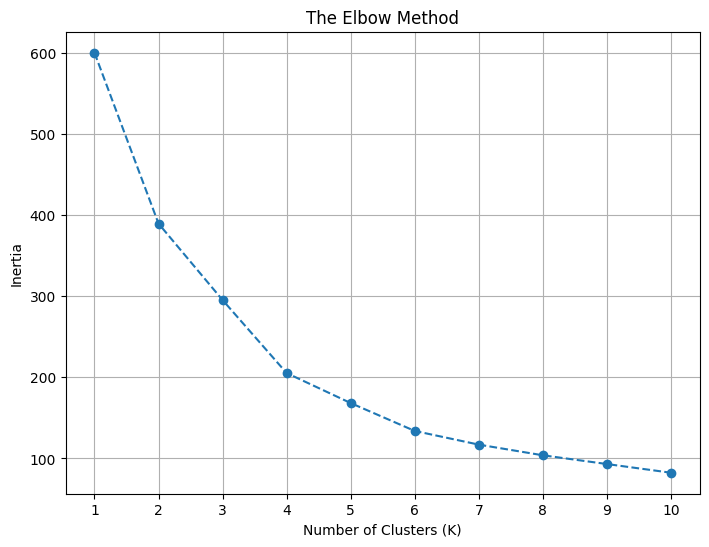

In [9]:
# The Elbow Method (using Inertia)
inertia_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

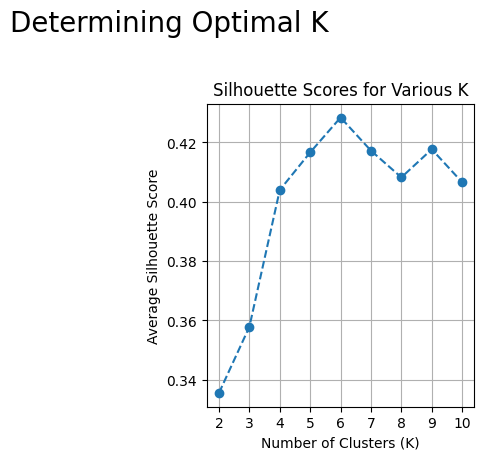

In [10]:
# Silhouette Score Analysis
silhouette_scores = []
k_range_sil = range(2, 11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range_sil, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range_sil)
plt.grid(True)

plt.suptitle("Determining Optimal K", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Applying K-Means with K=5

With our optimal K determined, we proceed to build the final model and label our data.

In [11]:
# Applying K-Means with K=5
optimal_k = 5

# Initialize and fit the final K-Means model
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# Assign the cluster labels back to our original dataframe
df['Cluster'] = kmeans_final.labels_

print("--- Dataframe with Final Cluster Labels ---")
print(df.head())

--- Dataframe with Final Cluster Labels ---
   CustomerID  Gender  Age  Annual_Income_k  Spending_Score  Cluster
0           1    Male   19               15              39        1
1           2    Male   21               15              81        1
2           3  Female   20               16               6        0
3           4  Female   23               16              77        1
4           5  Female   31               17              40        1


# Cluster Profiling

analyze the central tendency of each cluster to build our personas.

In [12]:
# Cluster Profiling

# Calculate summary statistics for each cluster
cluster_profile = df.groupby('Cluster')[features_for_clustering].agg(['mean', 'median', 'count'])
print(cluster_profile)

               Age              Annual_Income_k              Spending_Score  \
              mean median count            mean median count           mean   
Cluster                                                                       
0        46.250000   47.0    20       26.750000   26.5    20      18.350000   
1        25.185185   24.0    54       41.092593   40.0    54      62.240741   
2        32.875000   32.0    40       86.100000   78.5    40      81.525000   
3        39.871795   41.0    39       86.102564   78.0    39      19.358974   
4        55.638298   54.0    47       54.382979   54.0    47      48.851064   

                      
        median count  
Cluster               
0         14.5    20  
1         58.0    54  
2         83.0    40  
3         17.0    39  
4         48.0    47  


In [13]:
df

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3
